# 1. Introduction to the Perceptron

Welcome! This notebook will guide you through building your very first deep learning algorithm, the Perceptron, from scratch.

Perceptrons were one of the first algorithms discovered in the field of AI. Their significance was that they raised the hopes and expectations for the field of neural networks. A Perceptron is a machine learning algorithm that uses a single node (or "neuron") to predict a class label for a row of data. It's the simplest possible type of neural network.

### The Four Components of a Perceptron

A Perceptron has four main parts. Think of it as a simple decision-making process:

1. Input Values ( x ): This is your data. For example, in our case, we'll have two input values, x1 and x2.

2. Weights ( w ) and Bias ( b ):

- Weights: Each input value has a corresponding "weight". A weight represents how important that input is for the final decision. A bigger weight means that input matters more.
- Bias: The bias is an extra value that helps the model make a decision.
- Learning is simply the process of finding the perfect set of weights and bias.

3. Net Sum ( z ): This is the first calculation the Perceptron does. It multiplies each input by its weight, sums them all up, and then adds the bias.
$$
z=(x1⋅w1)+(x2⋅w2)+...+b 
$$

4. Activation Function: This is the final step. The Perceptron takes the Net Sum ( z ) and passes it through a simple function to make a final, binary decision (0 or 1).

- The simplest activation function is a step function:
- If the Net Sum ( z ) is greater than 0, predict 1.
- Otherwise, predict 0.

# 2. Setup and Creating the Dataset

First, let's import the libraries we'll need.

* `numpy`: For numerical operations.
* `pandas`: To easily look at our data in a table.
* `matplotlib`: For plotting our data.
* `sklearn.datasets.make_classification`: A handy function to create a simple, fake dataset for us to play with.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Creating the dataset

Here we generate a simulated dataset using scikit-learn's `make_classification` function. This creates a dataset with 2 input features and binary target labels.

We're asking for:
* `n_samples = 20`: 20 rows of data.
* `n_features = 2`: 2 input features (we'll call them `x1` and `x2`).
* `n_informative = 1`: Only 1 of the features is *actually* useful for telling the classes apart.
* `n_redundant = 0`: No extra, useless features.
* `n_clusters_per_class = 1`: Each class (0 and 1) is just one single "blob" of data.
* `random_state = 1`: This ensures that if you run this code, you get the *exact same* "random" data that I do.

In [2]:
features, targets = make_classification(n_samples = 20,
                                      n_features = 2,
                                      n_informative = 1,
                                      n_redundant = 0,
                                      n_clusters_per_class = 1,
                                      random_state = 1)

Let's put this data into a `pandas` DataFrame to see what it looks like.

In [3]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


Let's check the `shape` of our data. This tells us (rows, columns).

In [4]:
df

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0
5,0.234416,1.405825,1
6,0.530355,-1.292116,0
7,-0.122890,-0.667896,0
8,-0.845206,1.760128,1
9,1.659802,1.063621,1


In [5]:
features.shape

(20, 2)

In [6]:
targets.shape

(20,)

`np.bincount` is a quick way to count how many samples of each class we have.

In [8]:
np.bincount(targets)

array([10, 10])

# 3. Visualizing the dataset

We can visualize the dataset by plotting the two input features colored by the target class. This gives us a sense of how linearly separable the data is.

A **linearly separable** dataset is one where you can draw a single straight line to separate the two classes. A Perceptron can *only* solve problems that are linearly separable.

As we can see below, our data isn't *perfectly* separable, but there is an approximate linear decision boundary. Let's see if our Perceptron can find it.

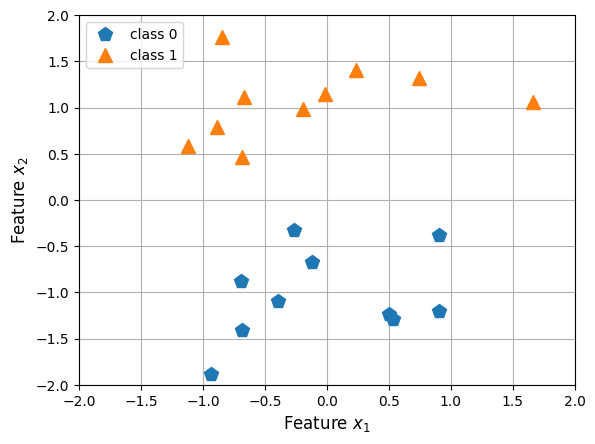

In [10]:
plt.plot(
    features[targets == 0,0],
    features[targets == 0,1],
    marker = 'p',
    markersize = 10,
    linestyle = '',
    label = 'class 0'
)

plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'class 1'

)

plt.legend(loc = 2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

# 4. Implementing a Perceptron

We can now implement the perceptron algorithm in Python. We will do this by creating a `Perceptron` class.

First, let's define the `__init__` method. This method is called whenever we create a new Perceptron object. It's used to set up our initial variables: `weights` and `bias`.

We'll initialize all weights to `0.0` and the bias to `0`.

In [11]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

ppn = Perceptron(num_features = 2)
ppn.weights

[0.0, 0.0]

In [12]:
ppn.bias

0

### Implementing the forward function

The **forward pass** is how the Perceptron makes a prediction.

The `forward` function will compute the weighted sum ($z$) and then use the activation function (the step function) to return a binary prediction (0 or 1).

In [13]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction

ppn = Perceptron(num_features = 2) # Re-initialize with 2 features
x = [1.23, 2.13]
ppn.forward(x)

0

The prediction in the above case is 0 because the weights and bias of the perceptron are still 0. It has not learned anything yet

### Updating the weights (The Learning Rule)

This is the most important part! The `update` method is where the *learning* happens. It takes a single training example (`x`, `y_true`), compares the `prediction` to the `y_true` label, and updates the weights and bias accordingly.

The update rule is:
1.  Calculate the `error = y_true - prediction`.
    * If the prediction is correct (0 vs 0 or 1 vs 1), the `error` will be **0**.
    * If it predicts 0 but should be 1, the `error` will be **1**.
    * If it predicts 1 but should be 0, the `error` will be **-1**.
2.  Update the bias: `self.bias += error`
3.  Update the weights: `self.weights[i] += error * x[i]`

This means that if the error is 0, **no updates happen**. The model only learns when it makes a mistake.

In [ ]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0

        return prediction
ppn = Perceptron(num_features = 2)
x = [1.1, 2.1]
ppn.update(x, y_true = 1)


Let's check what happened to the weights and bias. Since the prediction was 0 (all weights were 0), and the true label was 1, the `error` was `1 - 0 = 1`.

The new bias should be `0 + 1 = 1`.
The new weights should be `[0 + (1 * 1.1), 0 + (1 * 2.1)]` = `[1.1, 2.1]`.

In [15]:
print("Model parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model parameters:
Weights: [0.0, 0.0]
Bias: 0


# 5. Training the model

Now we can write a `train` function to automate the training process.

An **epoch** is one full pass through the entire training dataset. We will train the perceptron by iterating through the dataset for several epochs. In each epoch, we loop through all the `(x, y)` examples and call the `update` method for each one.

We'll also count the number of errors in each epoch. As the model learns, we should see the number of errors go down.

In [16]:
def train(model, X_train, y_train, epochs):
    # Training loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x,y)
            error_count += abs(error)

        print(f"Epoch {epoch + 1} errors {error_count}")

Let's create a new percepton and train it for 5 epochs on our features and targets,